In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting graphs and charts.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


To Read the CSV file from the Kaggle database


In [2]:
df=pd.read_csv('/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv')
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
df.shape 

(2500, 10)

In [4]:
count_ = df["Subscription Type"].value_counts()
count_

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

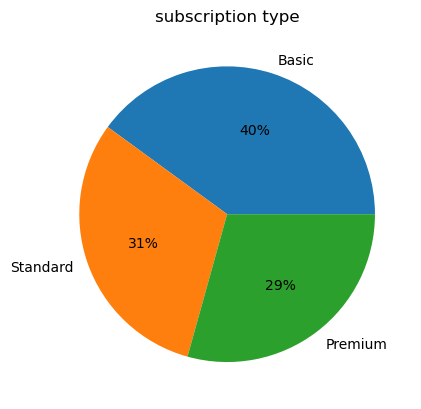

In [5]:
plt.pie(count_,labels=count_.index,autopct='%.0f%%')
plt.title("subscription type")
plt.show

In [6]:
count_devices=df['Device'].value_counts()
count_devices

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

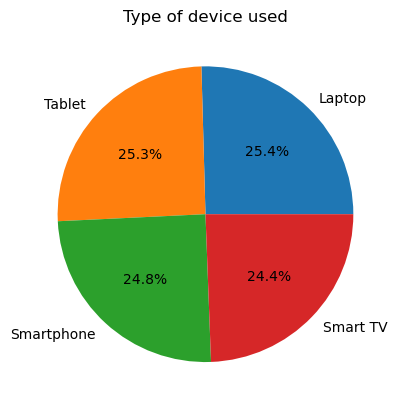

In [7]:
plt.pie(count_devices,labels=count_devices.index,autopct='%1.1f%%')
plt.title("Type of device used")
plt.show

Types of devices pie chart shows that there is approximatiely even distribution for all the devices used by the user 

Coverting join date and last payment date from object to datetime64

In [8]:
df['Join Date']=pd.to_datetime(df['Join Date'])
df['Last Payment Date']=pd.to_datetime(df['Last Payment Date'])



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


Number of subscriber from different countries

In [10]:
frequence = df.Country.value_counts()
print(frequence)
country=df['Country'].unique()
country

United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: Country, dtype: int64


array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

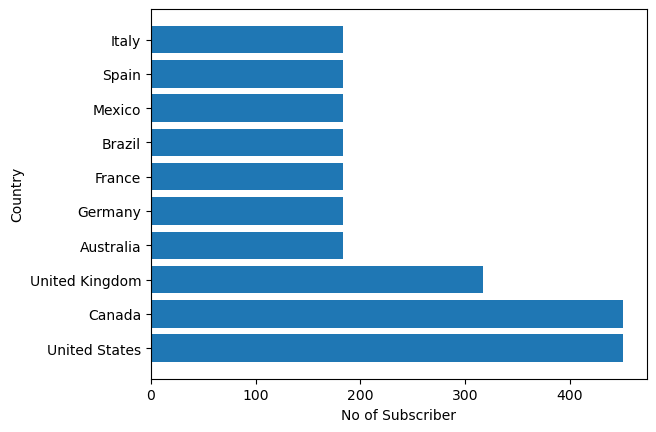

In [11]:
plt.barh(country,frequence)
plt.xlabel('No of Subscriber')
plt.ylabel('Country')
plt.show